# Classifier 6: Logistic Regression

* Linear regression with higher degree level (polynomial)
* Separate/ classify data with a non-linear line
* Known example: Sigmoid function

In [1]:
# Classifier: Logistic Regression(f)

# 6.f.1 Modelling - Implementing Model

# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification using support vector classifier with polynomial kernel
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Reading the processed data from local directory
processed_train=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_train.csv")
processed_test=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_test.csv")
target=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/target.csv")

# split the training data, test with sizes 
X_train, X_test, y_train, y_test = train_test_split(processed_train, target, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train the model with the default settings
log_reg_clf = LogisticRegression()

# Fit the clasifier model
log_reg_clf.fit(X_train, y_train)

# make predictions from model
y_pred=log_reg_clf.predict(X_test)

(712, 11) (179, 11)
(712, 1) (179, 1)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       110
           1       0.70      0.77      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



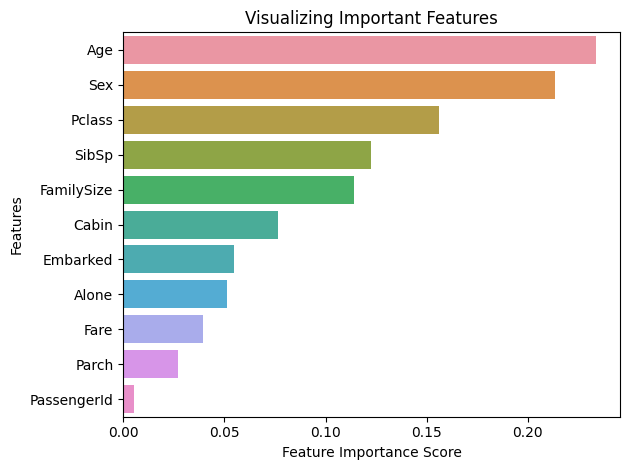

In [2]:
# 6.f.2 Modelling - model analysis

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# 83.2%

print(classification_report(y_test,y_pred))

# Feature Importance found through the coefficients 
feature_imp = pd.Series(np.abs(log_reg_clf.coef_[0]/len(processed_train.columns)), index=processed_train.columns).sort_values(ascending=False)

# Plot out the features' importance using a barplot
# plt.figure(figuresize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout() 

In [4]:
# 6.f.3 Modelling - Hyperparamater Tuning and model optimization

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Removing less important features (determined above)
# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

new_train = processed_train.drop(['Alone','Parch','Embarked', 'Pclass','Cabin'], axis=1)
new_test = processed_test.drop(['Alone','Parch','Embarked', 'Pclass','Cabin'], axis=1)

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.2)

# fit the classifier for tuning hyperparameter
log_reg_clf = LogisticRegression()

# Grid search CV (cross validation) to find the best hyperparameters for tuning
log_reg_param_grid = {
    'penalty':['l1','l2'],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100],
    'tol': [1e-4, 1e-3, 1e-2, 0.1],
#     'gamma': [0.0001, 0.001, 0.01, 0.1],
    'solver':['saga']
}

# Perform Hyperparameter Tuning
log_reg_ran_search = RandomizedSearchCV(log_reg_clf, log_reg_param_grid)
log_reg_ran_search.fit(X_train, y_train)
# print(pd.DataFrame(rbf_svc_grid_search.cv_results_))

print(log_reg_ran_search.best_estimator_)

# Fit the tuned model
tuned_log_reg_clf=log_reg_ran_search.best_estimator_
tuned_log_reg_clf.fit(X_train, y_train)


# Tuned model make predictions on test
y_pred = tuned_log_reg_clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/valid

LogisticRegression(C=0.5, solver='saga', tol=0.001)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuned Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       109
           1       0.76      0.74      0.75        70

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Your submission was successfully saved!


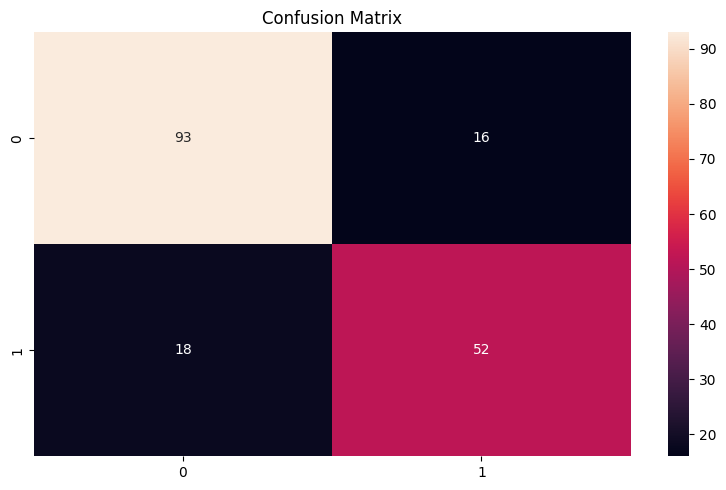

In [6]:
# 6.f.4 Modelling - Result Presentation

# Accuracy Score, can go as high as 85%
print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# Classification report
print(classification_report(y_test,y_pred))

# Confusion matrix (TP, FP, TN, NN)
conf_matrix=confusion_matrix(y_test, y_pred)

# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# make predictions on testing data again
prediction = tuned_log_reg_clf.predict(new_test)
# Make a new column to store the predictions
new_test['Survival_Predictions'] = pd.Series(prediction)

# Submit Output in Kaggle 
output = pd.DataFrame({'PassengerId': new_test.PassengerId, 'Survived': prediction})

# Assign output to a csv file
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

# Summary of Logistic Regression

* Kaggle accuracy: 0.75358, 0.76794, 0.77272, 0.76315, 0.76555

## Advantages:  
* Straightforward, easy to implement
* Easily extend to multinomial classification
* Provide direction of association (+/-) along with making prediction
* Good accuracy for simple dataset, especially when data can be linearlly separable

## Disadvantages:  
* Prone to overfit when # of data < # of features
* Only used to predict discrete function
* Can't solve non-linear problems because it has a linear surface
* Tough to find complex relationship between features and target, outperformed by compact algo like NN.